In [1]:
#Import drive
from google.colab import drive
#Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
os.chdir('drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Pytorch_vanilla_Beta_VAE/')
!ls

checkpoints	      fig_results	       README.md
checkpoints_scores    helpers.py	       sbatch_jean_zay
checkpoints_v1	      hyperparam.ini	       sbatch_lis_cluster
checkpoints_v2	      main.py		       scores.py
data		      model.py		       solver.py
dataset_2.py	      notebook		       utils.py
dataset.py	      parameters_combinations  visualizer.py
download_dsprites.sh  __pycache__	       viz
evaluate.py	      pytorch_FID


# 3DChairs:

In [ ]:
import matplotlib.pyplot as plt
import os
import torch
from model import BetaVAE_H
from viz.visualize import Visualizer as Viz

In [ ]:
def get_checkpoints(net, path, expe_name):
    file_path = os.path.join(path, expe_name, 'last')
    checkpoint = torch.load(file_path, map_location=torch.device('cpu'))
    net.load_state_dict(checkpoint['model_states']['net'])
    nb_epochs = checkpoint['iter']
    win_recon = checkpoint['win_states']['recon']
    win_kld = checkpoint['win_states']['kld']
    win_var = checkpoint['win_states']['var']
    win_mu = checkpoint['win_states']['mu']

    return net, nb_epochs, win_recon, win_kld, win_var, win_mu

In [ ]:
def viz_reconstruction(net, nb_epochs, expe_name, batch_chairs, win_recon, z_dim):
    viz_chairs = Viz(net, img_size, z_dim)
    viz_chairs.save_images = False

    recon_grid, _ = viz_chairs.reconstructions(batch_chairs, size=(8, 8))
    plt.figure(figsize=(10, 10))
    recon_grid = recon_grid.permute(1, 2, 0)
    plt.title('model: {}, nb_epochs trained: {}, score_recons: {}'.format(expe_name, nb_epochs, win_recon))
    plt.imshow(recon_grid.numpy())
    # plt.savefig('reconstruction_im/3DChairs/' + expe_name + '.png')
    plt.show()

In [ ]:
batch_chairs = torch.load('data/batch_chairs.pt')
img_size = (3, 64, 64)

path_to_model_folder_chairs = 'checkpoints/'
list_expe_10 = ['3dchairs_beta_1_zdim_10', '3dchairs_beta_4_zdim_10']
list_expe_16 = ['3dchairs_beta_1_zdim_16', '3dchairs_beta_4_zdim_16']
list_expe_32 = ['3dchairs_beta_1_zdim_32', '3dchairs_beta_4_zdim_32']
list_expe_64 = ['3dchairs_beta_1_zdim_64', '3dchairs_beta_4_zdim_64']

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Pytorch_vanilla_Beta_VAE/model.py:150: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


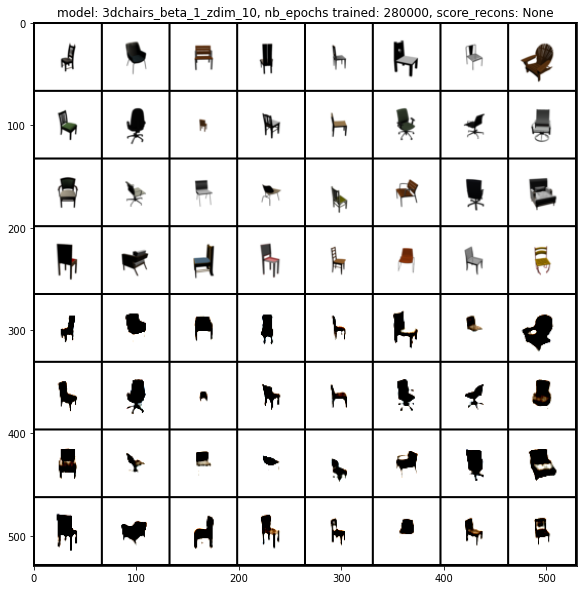

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


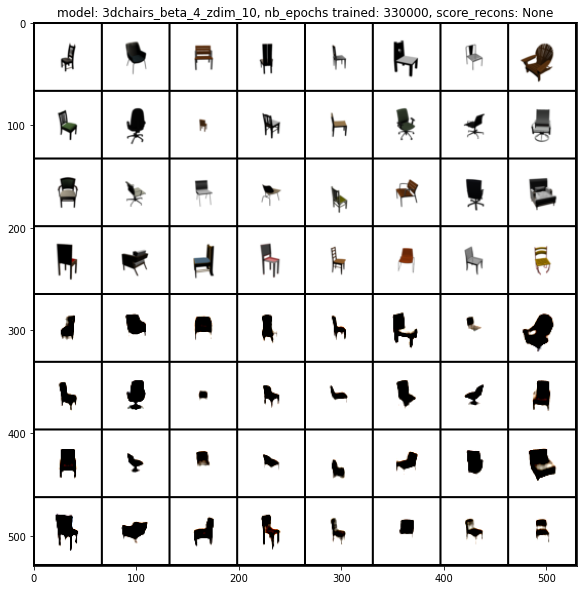

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


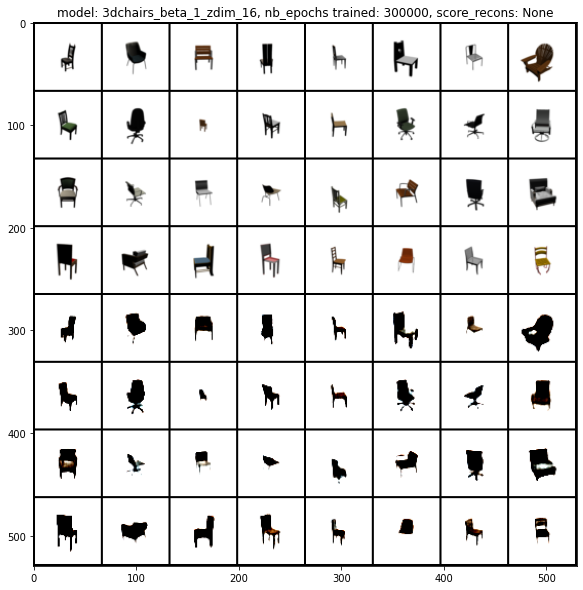

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


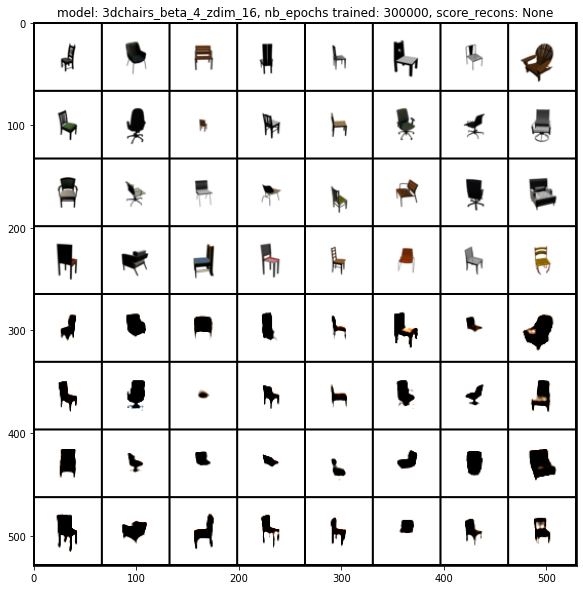

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


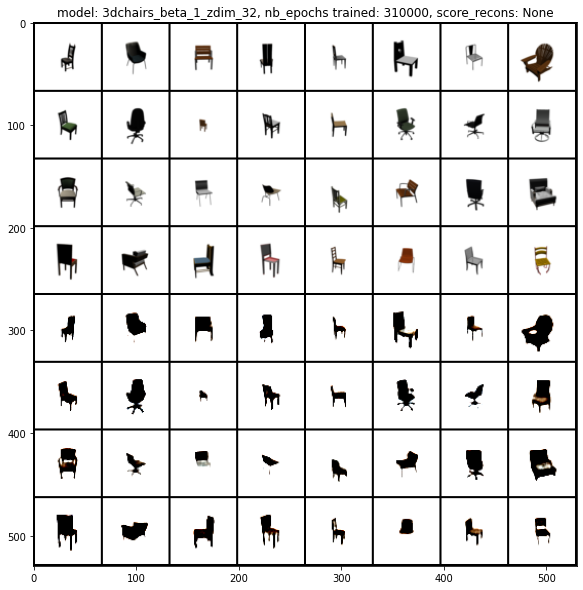

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


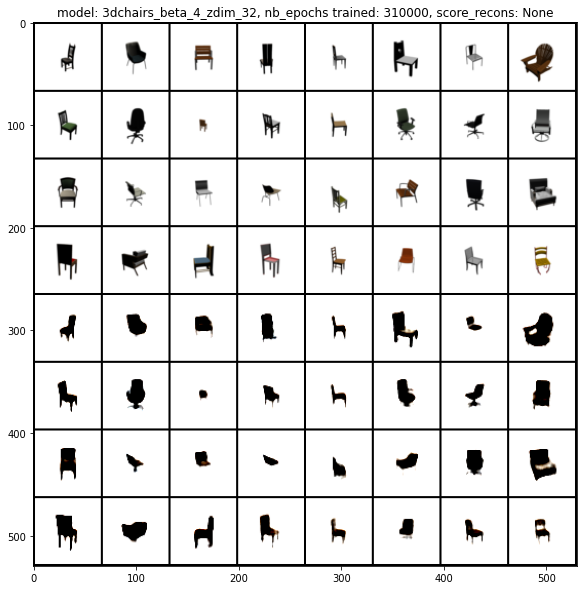

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


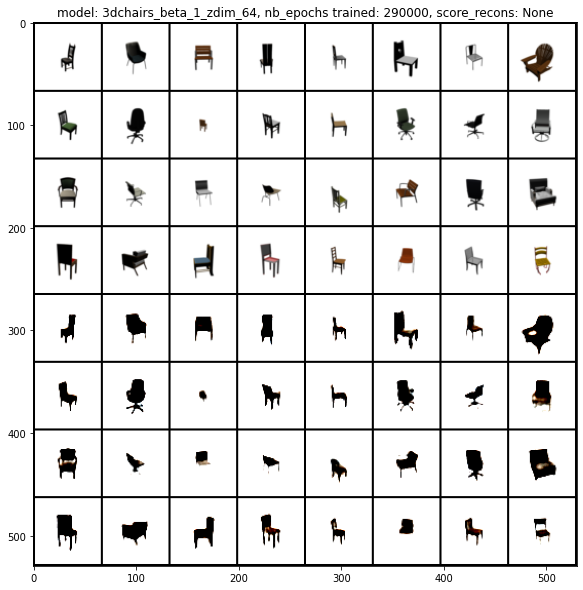

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


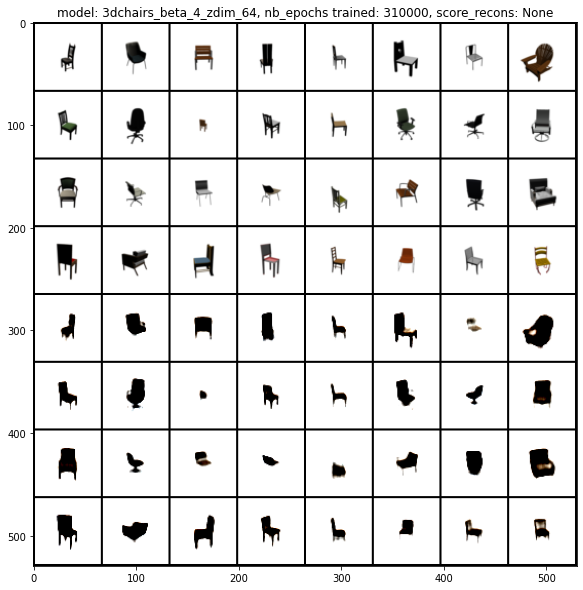

In [ ]:
z_dim=10
net = BetaVAE_H(z_dim=z_dim, nc=3)
for i in range(len(list_expe_10)):
    expe_name = list_expe_10[i]
    net, nb_epochs, win_recon, win_kld, win_var, win_mu = get_checkpoints(net, path_to_model_folder_chairs, expe_name)
    viz_reconstruction(net, nb_epochs, expe_name, batch_chairs, win_recon, z_dim)

z_dim=16
net = BetaVAE_H(z_dim=z_dim, nc=3)
for i in range(len(list_expe_16)):
    expe_name = list_expe_16[i]
    net, nb_epochs, win_recon, win_kld, win_var, win_mu = get_checkpoints(net, path_to_model_folder_chairs, expe_name)
    viz_reconstruction(net, nb_epochs, expe_name, batch_chairs, win_recon, z_dim)

z_dim=32
net = BetaVAE_H(z_dim=z_dim, nc=3)
for i in range(len(list_expe_32)):
    expe_name = list_expe_32[i]
    net, nb_epochs, win_recon, win_kld, win_var, win_mu = get_checkpoints(net, path_to_model_folder_chairs, expe_name)
    viz_reconstruction(net, nb_epochs, expe_name, batch_chairs, win_recon, z_dim)

z_dim=64
net = BetaVAE_H(z_dim=z_dim, nc=3)
for i in range(len(list_expe_64)):
    expe_name = list_expe_64[i]
    net, nb_epochs, win_recon, win_kld, win_var, win_mu = get_checkpoints(net, path_to_model_folder_chairs, expe_name)
    viz_reconstruction(net, nb_epochs, expe_name, batch_chairs, win_recon, z_dim)

## Samples:

In [ ]:
path_to_model_folder_chairs = 'checkpoints/'
size=(8,8)

def plot_samples(net, path, expe_name, z_dim):

  file_path = os.path.join(path, expe_name, 'last')
  checkpoint = torch.load(file_path, map_location=torch.device('cpu'))
  net.load_state_dict(checkpoint['model_states']['net'])
  nb_epochs = checkpoint['iter']

  viz_chairs = Viz(net, img_size, z_dim)
  viz_chairs.save_images = False
  
  fig = plt.figure(figsize=(10, 10))

  samples = viz_chairs.samples(size=size)

  samples = samples.permute(1, 2, 0)
  plt.title(expe_name)
  plt.imshow(samples.numpy())
  plt.show()

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Pytorch_vanilla_Beta_VAE/model.py:150: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


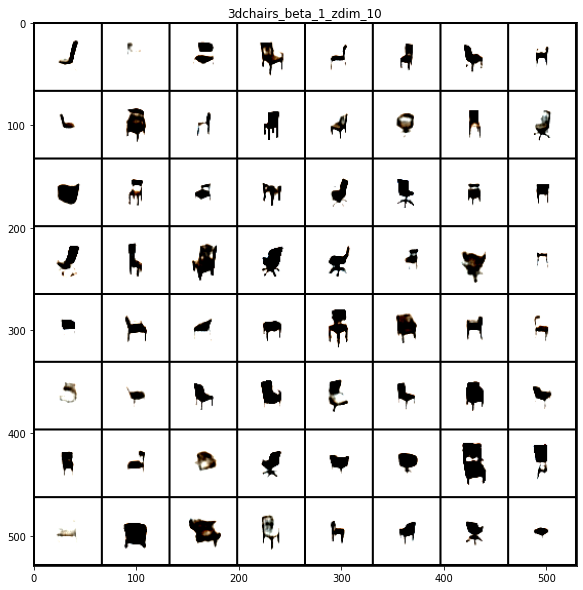

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


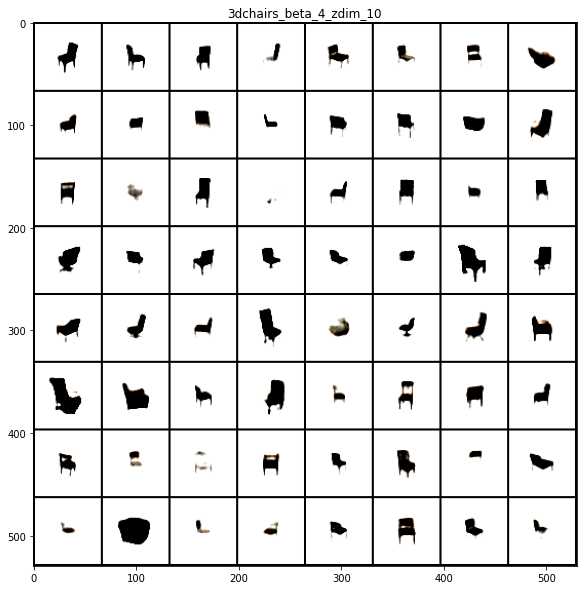

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


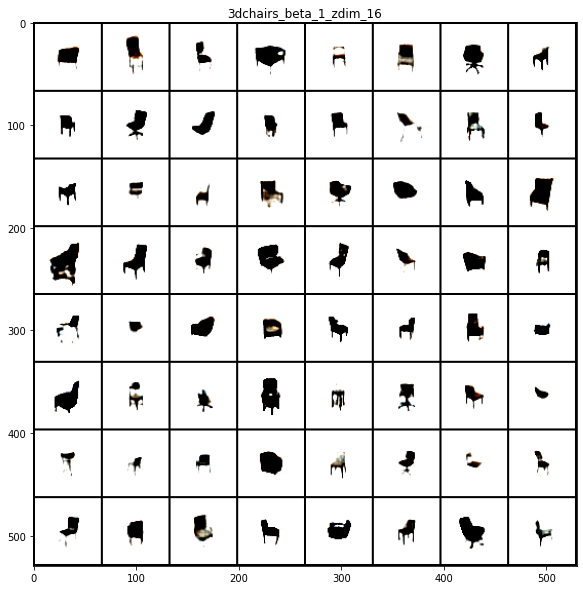

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


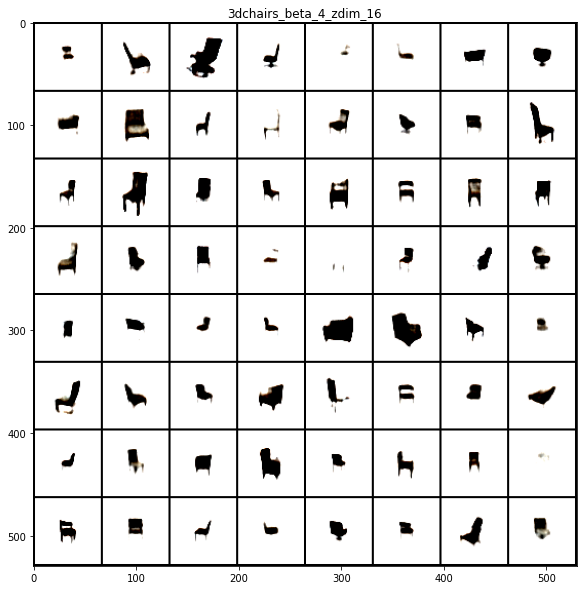

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


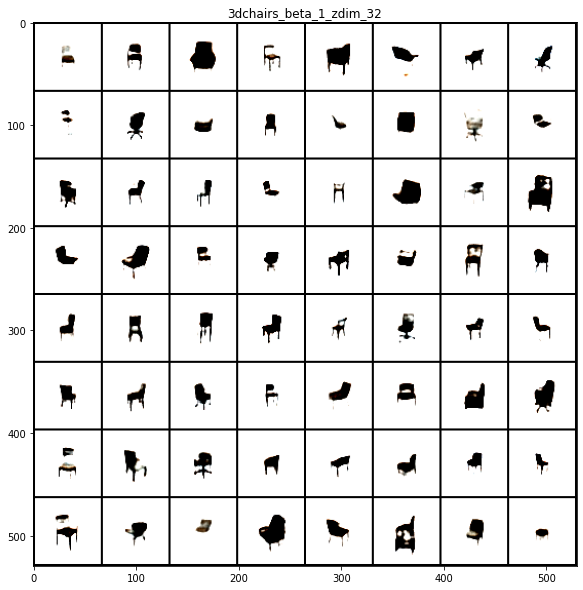

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


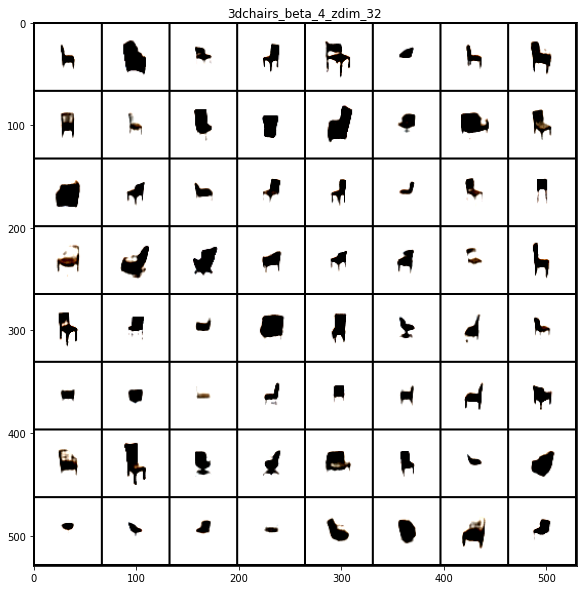

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


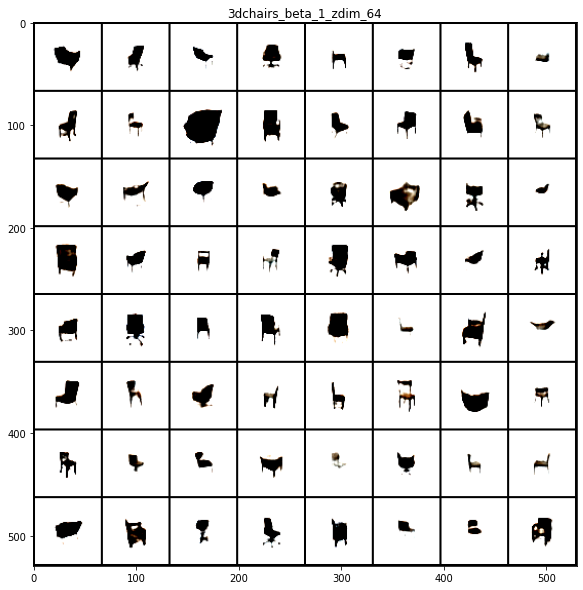

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


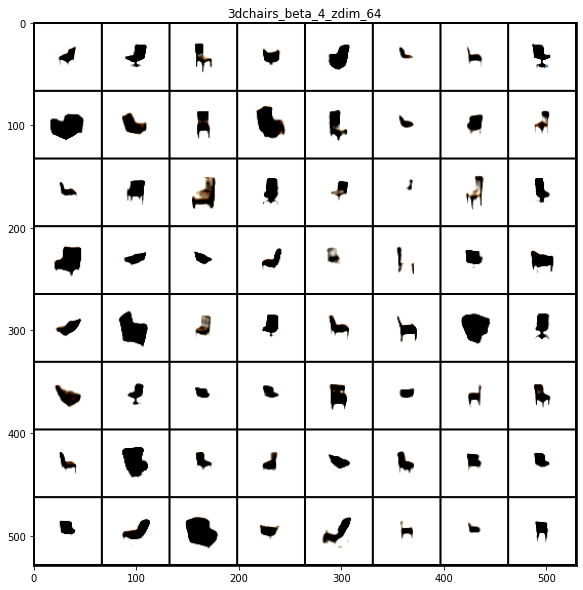

In [ ]:
expe_name = ['3dchairs_beta_1_zdim_10', '3dchairs_beta_4_zdim_10', '3dchairs_beta_1_zdim_16', '3dchairs_beta_4_zdim_16', '3dchairs_beta_1_zdim_32', '3dchairs_beta_4_zdim_32', '3dchairs_beta_1_zdim_64', '3dchairs_beta_4_zdim_64']

path = 'checkpoints/'
img_size = (3, 64, 64)

for i in expe_name:

  latent_dim = [int(s) for s in i.split('_') if s.isdigit()][-1]
  model = BetaVAE_H(z_dim=latent_dim, nc=3)

  plot_samples(model, path, i, latent_dim)

  

## All latent traversal:

In [ ]:
path_to_model_folder_chairs = 'checkpoints/'
size=(8,8)

def plot_traversal(net, path, expe_name, z_dim):

  file_path = os.path.join(path, expe_name, 'last')
  checkpoint = torch.load(file_path, map_location=torch.device('cpu'))
  net.load_state_dict(checkpoint['model_states']['net'])
  nb_epochs = checkpoint['iter']

  viz_chairs = Viz(net, img_size, z_dim)
  viz_chairs.save_images = False
    
  traversals = viz_chairs.all_latent_traversals(size=8)
  fig = plt.figure(figsize=(10, 10))
  traversals = traversals.permute(1, 2, 0)
  plt.title(expe_name)
  plt.imshow(traversals.numpy())
  plt.show()

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Pytorch_vanilla_Beta_VAE/model.py:150: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


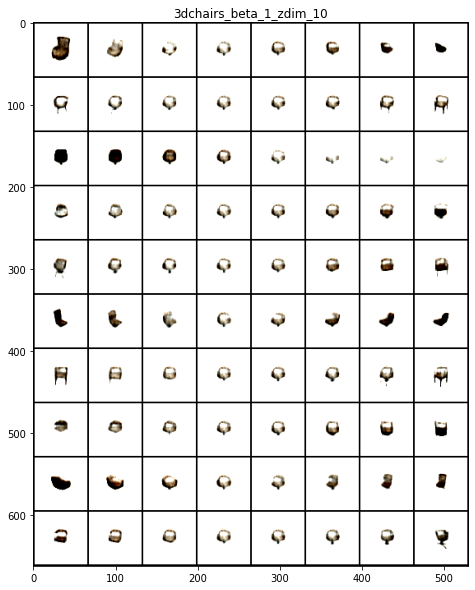

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


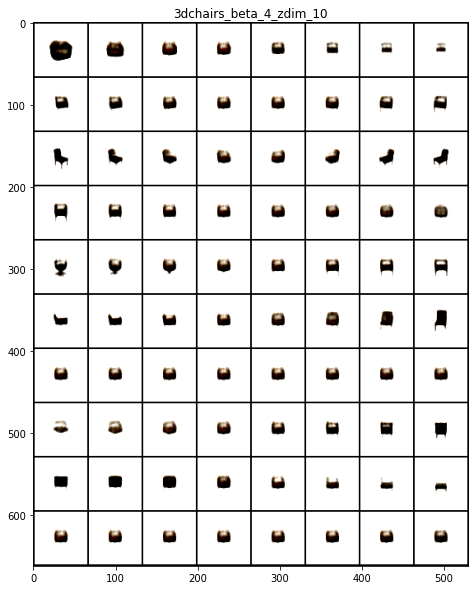

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


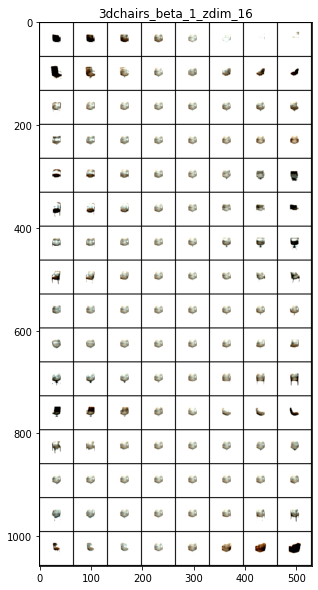

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


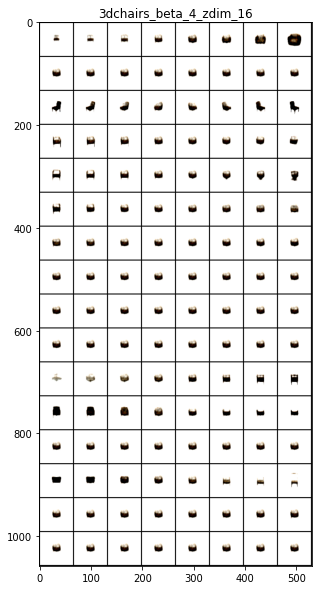

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


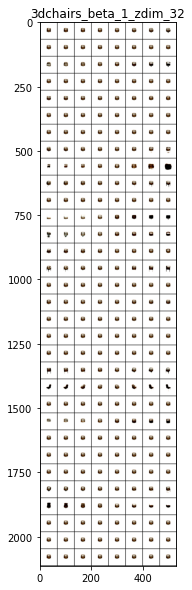

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


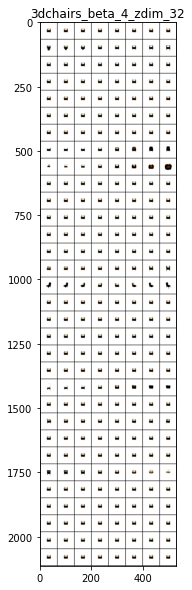

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


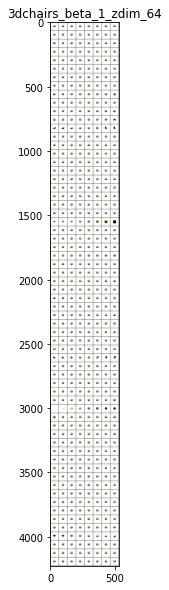

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


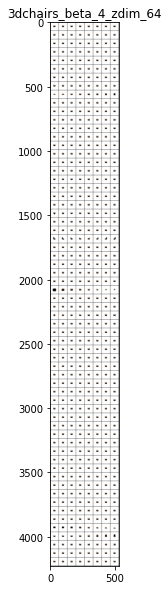

In [ ]:
expe_name = ['3dchairs_beta_1_zdim_10', '3dchairs_beta_4_zdim_10', '3dchairs_beta_1_zdim_16', '3dchairs_beta_4_zdim_16', '3dchairs_beta_1_zdim_32', '3dchairs_beta_4_zdim_32', '3dchairs_beta_1_zdim_64', '3dchairs_beta_4_zdim_64']

path = 'checkpoints/'
img_size = (3, 64, 64)

for i in expe_name:

  latent_dim = [int(s) for s in i.split('_') if s.isdigit()][-1]
  model = BetaVAE_H(z_dim=latent_dim, nc=3)

  plot_traversal(model, path, i, latent_dim)

## traversal single latent:

In [ ]:
path_to_model_folder_chairs = 'checkpoints/'
size=(8,8)

def plot_traversal_single(net, path, expe_name, indx, z_dim):

  file_path = os.path.join(path, expe_name, 'last')
  checkpoint = torch.load(file_path, map_location=torch.device('cpu'))
  net.load_state_dict(checkpoint['model_states']['net'])
  nb_epochs = checkpoint['iter']

  viz_chairs = Viz(net, img_size, z_dim)
  viz_chairs.save_images = False
    
  traversal = viz_chairs.latent_traversal_line(cont_idx=indx, size=12)
  traversal = traversal.permute(1, 2, 0)

  fig = plt.figure(figsize=(10, 10))
  plt.title(expe_name)
  plt.imshow(traversal.numpy())
  plt.show()

/content/drive/My Drive/Work/Thesis_Julien_Dejasmin/Work/code/Pytorch_vanilla_Beta_VAE/model.py:150: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  init.kaiming_normal(m.weight)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


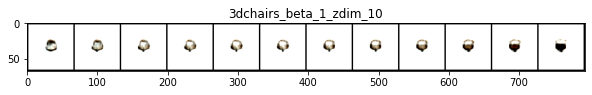

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


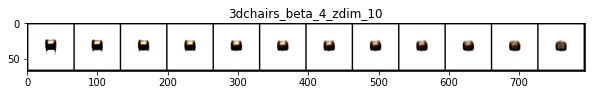

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


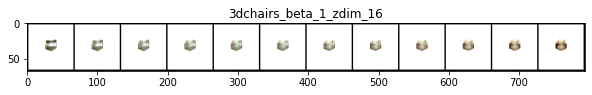

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


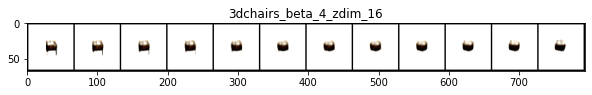

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


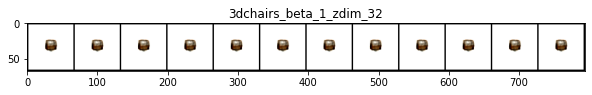

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


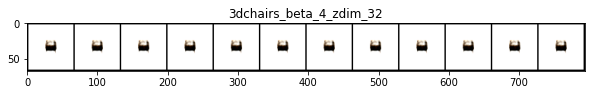

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


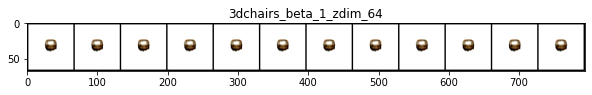

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


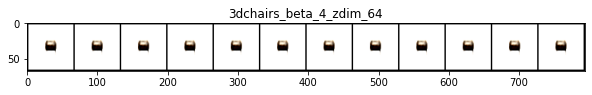

In [ ]:
expe_name = ['3dchairs_beta_1_zdim_10', '3dchairs_beta_4_zdim_10', '3dchairs_beta_1_zdim_16', '3dchairs_beta_4_zdim_16', '3dchairs_beta_1_zdim_32', '3dchairs_beta_4_zdim_32', '3dchairs_beta_1_zdim_64', '3dchairs_beta_4_zdim_64']

path = 'checkpoints/'
img_size = (3, 64, 64)
indx = 3

for i in expe_name:

  latent_dim = [int(s) for s in i.split('_') if s.isdigit()][-1]
  model = BetaVAE_H(z_dim=latent_dim, nc=3)

  plot_traversal_single(model, path, i, indx, latent_dim)